ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<ipython-input-2-224657624695>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


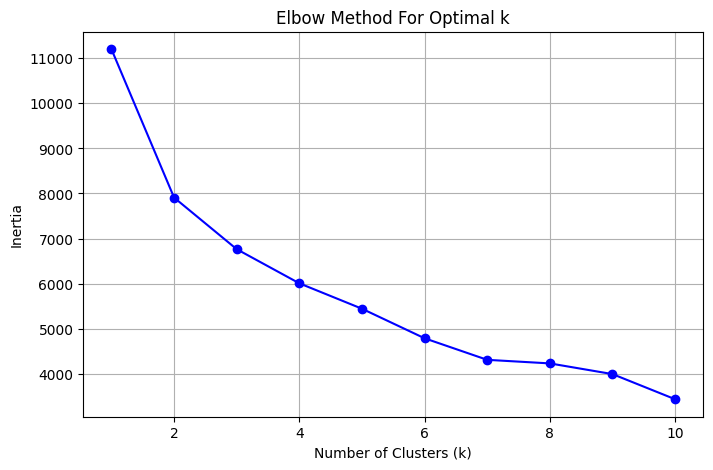

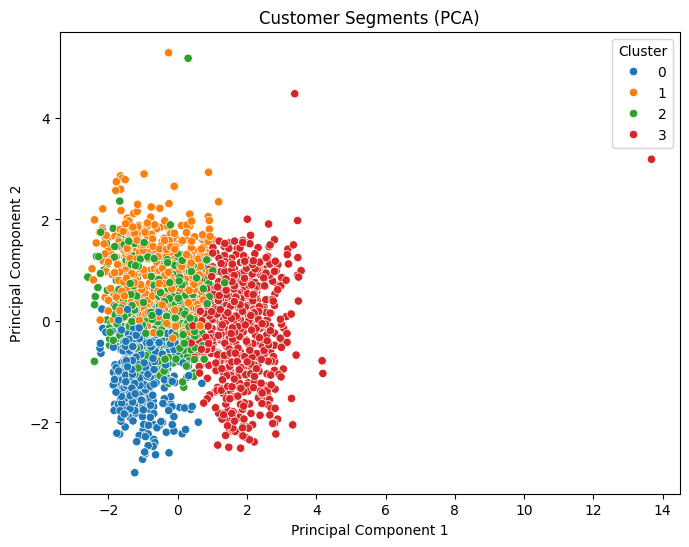

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

# Check for missing values
print(df.isnull().sum())

# Fill missing Income with median
df['Income'].fillna(df['Income'].median(), inplace=True)

# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Age from Year_Birth
df['Age'] = 2025 - df['Year_Birth']

# Total Children
df['Children'] = df['Kidhome'] + df['Teenhome']

# Total Spendings
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts',
                       'MntGoldProds']].sum(axis=1)

# Selected features
features = ['Income', 'Age', 'Children', 'Recency', 'TotalSpent']
X = df[features]

# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Using k=4 as an example (choose based on elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster summary
df.groupby('Cluster')[features].mean()

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()